# `Zoom` and `Pan` Interactivity

Use the `ggtb()` function to enable `Pan` and `Zoom` interactivity on a chart.

This function adds a toolbar containing three tool-buttons: pan, rubber-band zoom, and center-point zoom. 

Each tool uses **mouse-drag** for its specific functionality. Additionally, the **mouse wheel** can be used for zooming in and out, regardless of the selected tool.

The behavior of these tools adapts to the initial mouse drag direction:
- Near-horizontal drag: restricts panning to horizontal movement or creates a vertical band for zooming.
- Near-vertical drag: limits panning to vertical movement or produces a horizontal band for zooming.
- Diagonal drag: allows panning in any direction or creates a rectangular area for zooming.

**Double-clicking** anywhere on the plot resets it to its original coordinates, regardless of whether a tool is selected or not.

Click the 4th button, `Reset`, to reset the plot and tools to their original state.

In [1]:
%useLatestDescriptors
%use lets-plot
%use dataframe

In [2]:
LetsPlot.getInfo()

Lets-Plot Kotlin API v.4.9.0. Frontend: Notebook with dynamically loaded JS. Lets-Plot JS v.4.5.1.

In [3]:
val mpg = DataFrame.readCSV("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
mpg.head(3)

DataFrame: rowsCount = 3, columnsCount = 12 
 untitled manufacturer model displ year cyl trans drv cty hwy fl class 1 audi a4 1.800000 1999 4 auto(l5) f 18 29 p compact 2 audi a4 1.800000 1999 4 manual(m5) f 21 29 p compact 3 audi a4 2.000000 2008 4 manual(m6) f 20 31 p compact

In [4]:
import javax.imageio.ImageIO
import java.net.URL
import org.jetbrains.letsPlot.geom.Extensions.create

val url = URL("https://github.com/JetBrains/lets-plot/raw/master/docs/f-24g/images/shevy_impala_64.png")
val img = ImageIO.read(url)
val shevy = RasterData.create(img)
shevy

RasterData(2000 x 1334 x 4)


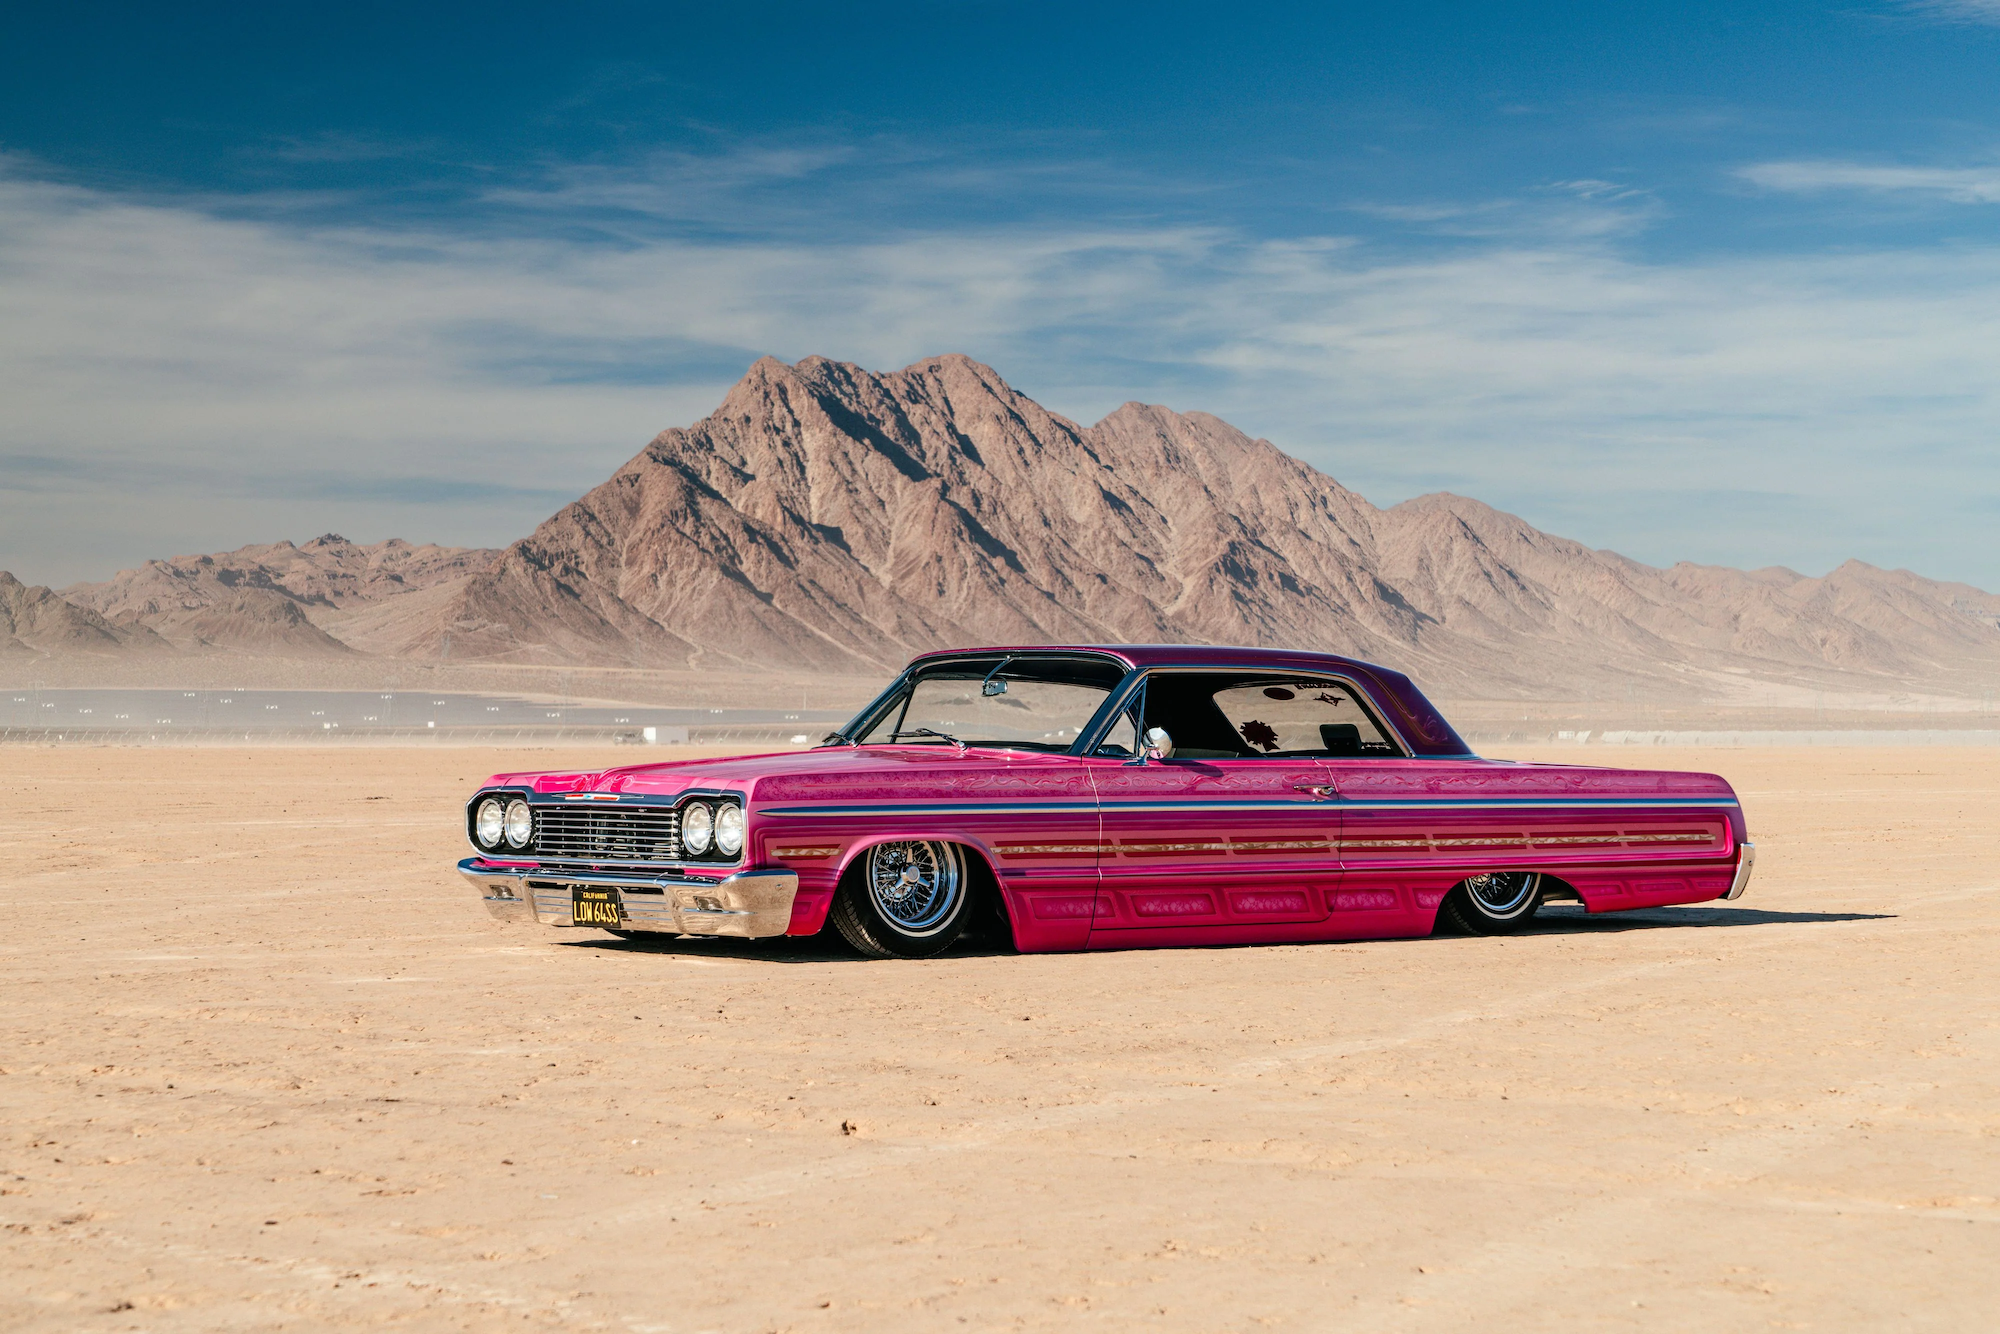

In [5]:
val p = letsPlot(mpg.toMap()) {
            x = "displ"
            y = "hwy"
            color = "manufacturer" 
        } + ggtb() +                       // <--- NEW!
    themeBW() +
    flavorHighContrastDark() +
    theme(axisTitle="blank").legendPositionNone() +
    ggsize(1000, 600)

p + geomImshow(shevy, extent = listOf(5.5, 7, 35, 45)) +
    geomPoint(position = positionJitter(height = 0, width = 0.1, seed = 0), 
              tooltips = layerTooltips("displ", "cyl", "trans")
                .title("@manufacturer @model @year")) +
    geomLabel(checkOverlap = true, 
              alpha = 0.5,
              position = positionJitter(seed = 0)) {label = "model"} +
    ggtitle("Highway MPG vs Engine displacement [L]") +
    scaleColorBrewer(palette = "Set3") +
    scaleContinuous(aesthetic = listOf("x", "y"), otherOptions = mapOf("position" to "both")) +
    coordCartesian()
